In [34]:
import pandas as pd
import numpy as np
import pyro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("husl")

In [35]:
!ls

diamonds.csv                      diamons_gaussian_regression.ipynb


In [36]:
diamonds = pd.read_csv("diamonds.csv").reset_index(drop=True)
diamonds = diamonds.drop(columns=['Unnamed: 0'])

In [39]:
print("MAX price: {}".format(np.max(diamonds['price'])))

MAX price: 18823


## Dataset Description

A data frame with 53940 rows and 10 variables:
- price price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43- 79)

**carat**  = Carat weight of the diamond  
**cut** = Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal  
**color** = Color of the diamond, with D being the best and J the worst  
**clarity** = How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3  
**depth** = depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter  
**table** = table%: The width of the diamond's table expressed as a percentage of its average diameter  
**price** = the price of the diamond  
**x** = length mm  
**y** = width mm  
**z** = depth mm  

In [40]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.drop(['x','y','z'],axis=1,inplace=True)

In [41]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,volume
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,124.568444


## Visualization Datasets
- https://www.kaggle.com/danielmarrama/diamond-exploratory-analysis-and-visualizations

Text(0.5,1,'Distribution of Diamond Volume')

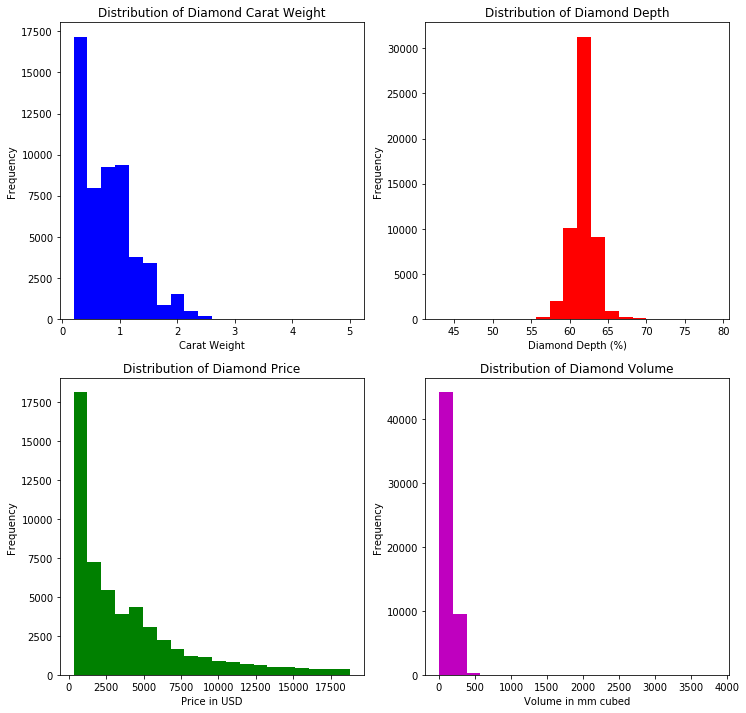

In [51]:
plt.figure(figsize=[12,12])

plt.subplot(221)
plt.hist(diamonds['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

plt.subplot(222)
plt.hist(diamonds['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

plt.subplot(223)
plt.hist(diamonds['price'],bins=20,color='g')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

plt.subplot(224)
plt.hist(diamonds['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

## Regression with Pyro

In [52]:
import numpy as np
import torch
import torch.nn as nn

import pyro
from pyro.distributions import Normal
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

In [60]:
class RegressionModel(nn.Module):
    def __init__(self, p):
        # p = number of features
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(p, 1)

    def forward(self, x):
        return self.linear(x)

In [61]:
regression_model = RegressionModel(1)

In [62]:
regression_model

RegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)